## Introduction

### Develop 2D

/var/folders/y2/808x0vrs0219dlwh974ks0q00000gn/T/ipykernel_80795/2826489451.py:14: RuntimeWarning: invalid value encountered in sqrt
  S = np.sqrt( nominator / denominator )


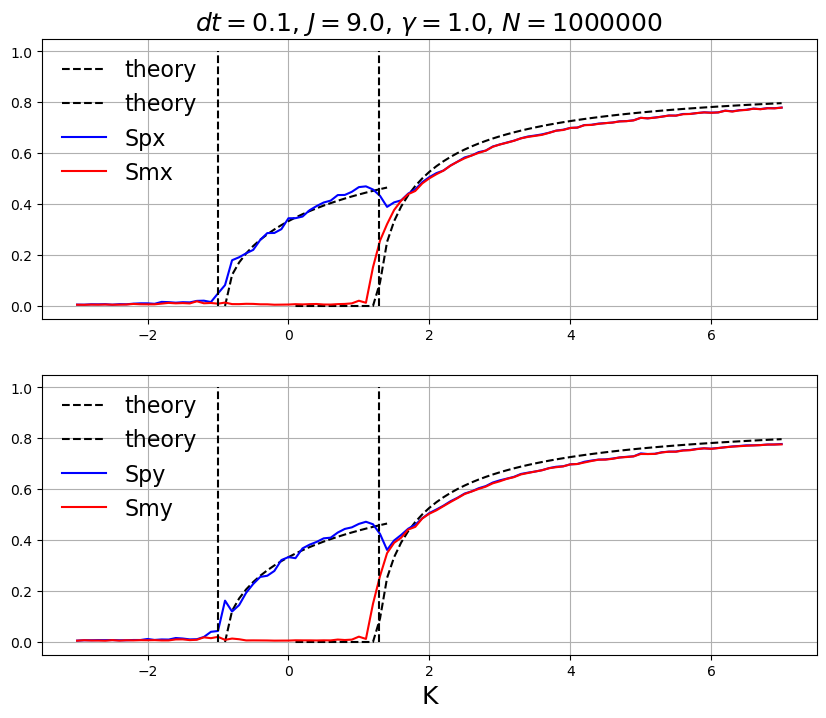

In [102]:
import json
import numpy as np
import matplotlib.pyplot as plt
from utils import make_omega, rk4, make_cauchy, rhs_2Dswarmlator_torus, rhs_2d_swarmalator, \
      find_2D_rainbow_order_parameters, find_rainbow_order_parameters

fname = 'data/2023-11-06/2D_swarmalator_torus_J=9_n=100000_T_200.0_ntrials_1_cauchy_random.json'
with open(fname,'r') as f:
    data = json.load(f)

def S_phasewave(j,k,delta):
    nominator = j**2 + 2*j*k - 4*k*(delta+delta) - 4*j*(delta+delta)
    denominator = j*(j+2*k)
    S = np.sqrt( nominator / denominator )
    return S

def S_sync(j,k,delta):
    nominator = j * k - 2 * k * gamma - j * gamma
    denominator = j * k    
    temp = nominator / denominator
    if temp < 0:
        return 0
    else:
        S = np.sqrt(nominator / denominator)
    return S

dt = 0.1
n = 10**6
gamma = 1.0
J = 9.0
k1 = -1
k2 = 9.0/7

K_values = data['Ks']
Smx_values = data['Smx']
Spx_values = data['Spx']

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
axes = axes.flatten()

ax = axes[0]
lim = 45
k_temp = K_values[:lim]
ax.plot(k_temp, [S_phasewave(J,k,gamma) for k in k_temp], label='theory', linestyle='dashed', color='black')
k_temp = K_values[-70:]
ax.plot(k_temp, [S_sync(J,k,gamma) for k in k_temp], label='theory', linestyle='dashed', color='black')
ax.plot(K_values, Spx_values, label='Spx', color="blue")
ax.plot(K_values, Smx_values, label='Smx', color="red")
#ax.set_xlabel('K', fontsize=18)
ax.vlines(k1,0,1, color='black', linestyles='dashed')
ax.vlines(k2,0,1, color='black', linestyles='dashed')
ax.set_title(f'$dt={dt}$, $J={J}$, $\\gamma={gamma}$, $N={n}$', fontsize=18)
ax.legend(fontsize=16, frameon=False)
ax.grid(True)

ax = axes[1]
Smy_values = data['Smy']
Spy_values = data['Spy']
lim = 45
k_temp = K_values[:lim]
ax.plot(k_temp, [S_phasewave(J,k,gamma) for k in k_temp], label='theory', linestyle='dashed', color='black')
k_temp = K_values[-70:]
ax.plot(k_temp, [S_sync(J,k,gamma) for k in k_temp], label='theory', linestyle='dashed', color='black')
ax.plot(K_values, Spy_values, label='Spy', color="blue")
ax.plot(K_values, Smy_values, label='Smy', color="red")
ax.set_xlabel('K', fontsize=18)
ax.vlines(k1,0,1, color='black', linestyles='dashed')
ax.vlines(k2,0,1, color='black', linestyles='dashed')
#ax.set_title(f'$dt={dt}$, $J={J}$, $\\gamma={gamma}$, $N={n}$', fontsize=18)
ax.legend(fontsize=16, frameon=False)
ax.grid(True)
